# OpenABM-Covid19 - Example 101

This shows a very simple example of getting the model, changing some parameters and then running the simulation.

The first step is to get the baseline parameters. We then reduce the size of the population to 10,000 people so that the simulation will run quickly in this example.

In [1]:
import example_utils as utils
params = utils.get_baseline_parameters()
params.set_param( "n_total", 100000 )

The next step is to get the simulation and then to run it for 10 days

In [2]:


sim = utils.get_simulation( params )
sim.env.model.get_param('health_code_system_on')
sim.env.model.update_running_params('health_code_system_on', 0)
sim.steps( 100 )

NameError: name 'sim' is not defined

We can now look at the time-series of the number of people of people infected.

In [3]:
import pandas as pd
timeseries = pd.DataFrame( sim.results )
print( timeseries.loc[:,{"time","total_infected"}])

    total_infected  time
0                5     1
1                5     2
2                5     3
3                5     4
4                6     5
..             ...   ...
95           82999    96
96           83017    97
97           83035    98
98           83046    99
99           83055   100

[100 rows x 2 columns]


The model can now be run for a further 100 days and the plot the time-sereies of the total number of people infected.

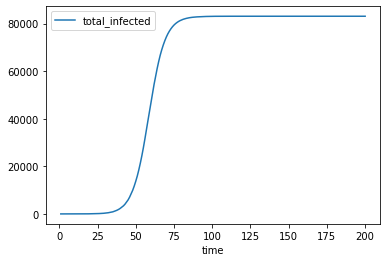

In [4]:
sim.steps( 100 )
timeseries = pd.DataFrame( sim.results )
timeseries.plot( x = "time", y = "total_infected" )